In [234]:
import numpy as np
from sklearn.datasets import make_sparse_spd_matrix
from scipy.sparse import spdiags
import matplotlib.pyplot as plt
from IPython.display import Math

### 1. The efficiency of different iterative methods for solving a linear system.

1.a Implement programs for the four methods: Jacobi, Gauss-Seidel, Steepest (or Gradient) Descent (SD) and Conjugate Gradient (CG).<br>
1.b Use the semilogy() plotting function to plot a convergence graph of $∥A\textbf{x}^{(k)} − b∥_2$.<br>
Also plot the convergence factor $\frac{∥A\textbf{x}^{(k)} − b∥_2}
 {∥A\textbf{x}^{(k-1)} − b∥_2}$.

In [88]:
def get_DLU(A):
    D = np.diag(np.diag(A))
    L = np.tril(A) - D
    U = np.triu(A) - D
    return D,L,U

In [235]:
# Testing DLU function
# a = np.array([[1,2,3],[4,5,6],[7,8,9]])
# D,L,U = get_DLU(a)
# print("A:")
# print(a)
# print("D:")
# print(D)
# print("L:")
# print(L)
# print("U:")
# print(U)

In [156]:
n=100
data = -1*np.ones((3,n))
data[1,:] *= -2.1
diags = [-1, 0, 1]
A = spdiags(data, diags, n, n).toarray()
b = np.random.rand(n,1)
x = np.zeros((n,1))

#### Jacobi (with w=1)

In [177]:
def jacobi(A, b, x_0, w, maxIter, epsilon, convergence_criterion):
    convergences = []
    convergence_factors = []
    D,L,U = get_DLU(A)
    M_inv = w * np.linalg.inv(D)
    x_prev = x_0
    convergence_prev = np.linalg.norm(np.dot(A, x_prev) - b)
    for k in range(maxIter):
        convergences.append(convergence_prev)
        r_prev = b - np.dot(A, x_prev)
        x_k = x_prev + np.dot(M_inv, r_prev)
        convergence = np.linalg.norm(np.dot(A, x_k) - b)
        convergence_factor = convergence / convergence_prev
        convergence_factors.append(convergence_factor)
        if convergence_factor <= convergence_criterion:
            break
        x_prev = x_k
        convergence_prev = convergence
    return x_prev, convergences, convergence_factors

In [178]:
maxIter = 100
epsilon = 0.001
convergence_criterion = 0.001
w = 1
learned_x, jacobi_convergences, jacobi_convergence_factors = jacobi(A, b, x, w, maxIter, epsilon, convergence_criterion)

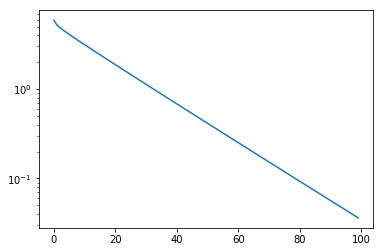

In [196]:
#jacobi_convergences
# w = 3
# h = 6
# plt.figure(figsize=(w, h))
plt.figure()
y = jacobi_convergences

plt.semilogy(y)


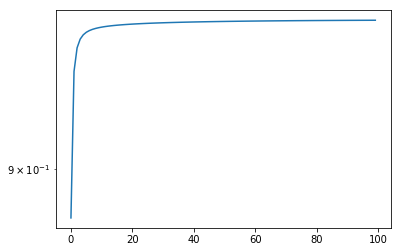

In [197]:
#jacobi_convergence_factors
plt.figure()
plt.semilogy(jacobi_convergence_factors)


#### Jacobi (with w=0.75)

In [201]:
maxIter = 100
epsilon = 0.001
convergence_criterion = 0.001
w = 0.75
learned_x, jacobi_convergences, jacobi_convergence_factors = jacobi(A, b, x, w, maxIter, epsilon, convergence_criterion)

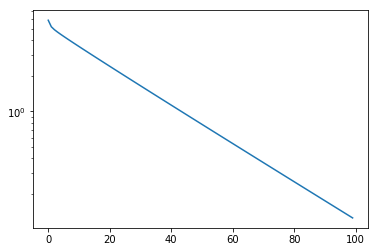

In [199]:

plt.figure()
y = jacobi_convergences

plt.semilogy(y)


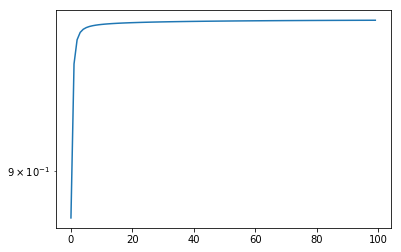

In [200]:
#jacobi_convergence_factors
plt.figure()
plt.semilogy(jacobi_convergence_factors)


#### Gauss-Seidel

In [206]:
def gauss_seidel(A, b, x_0, w, maxIter, epsilon, convergence_criterion):
    convergences = []
    convergence_factors = []
    D,L,U = get_DLU(A)
    M_inv = w * np.linalg.inv(w*L + D)
    x_prev = x_0
    convergence_prev = np.linalg.norm(np.dot(A, x_prev) - b)
    for k in range(maxIter):
        convergences.append(convergence_prev)
        r_prev = b - np.dot(A, x_prev)
        x_k = x_prev + np.dot(M_inv, r_prev)
        convergence = np.linalg.norm(np.dot(A, x_k) - b)
        convergence_factor = convergence / convergence_prev
        convergence_factors.append(convergence_factor)
        if convergence_factor <= convergence_criterion:
            break
        x_prev = x_k
        convergence_prev = convergence
    return x_prev, convergences, convergence_factors

In [207]:
maxIter = 100
epsilon = 0.001
convergence_criterion = 0.001
w = 1
learned_x, gs_convergences, gs_convergence_factors = gauss_seidel(A, b, x, w, maxIter, epsilon, convergence_criterion)

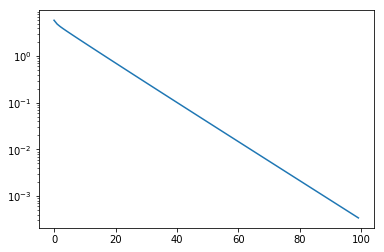

In [208]:

plt.figure()
y = gs_convergences

plt.semilogy(y)


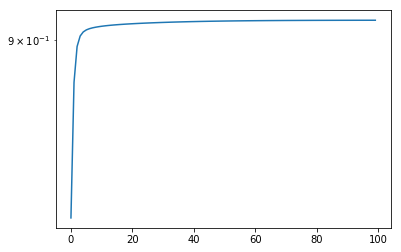

In [209]:
plt.figure()
plt.semilogy(gs_convergence_factors)


#### Steepest Descent

In [228]:
def steepest_descent(A, b, x_0, maxIter, epsilon, convergence_criterion):
    convergences = []
    convergence_factors = []
    x_prev = x_0
    r_prev = b - np.dot(A, x_0)
    convergence_prev = np.linalg.norm(np.dot(A, x_prev) - b)
    for k in range(maxIter):
        convergences.append(convergence_prev)
        numerator1 = np.dot(r_prev.T,r_prev)
        denominator1 = np.dot(r_prev.T, (np.dot(A, r_prev)))
        alpha = numerator1 / denominator1
        x_k = x_prev + alpha * r_prev
        convergence = np.linalg.norm(np.dot(A, x_k) - b)
        convergence_factor = convergence / convergence_prev
        convergence_factors.append(convergence_factor)
        r_k = r_prev - alpha * np.dot(A, r_prev)
        if convergence_factor <= convergence_criterion:
            break
        x_prev, r_prev = (x_k, r_k)
        convergence_prev = convergence
    return x_prev, convergences, convergence_factors

In [230]:
maxIter = 100
epsilon = 0.001
convergence_criterion = 0.001
learned_x, sd_convergences, sd_convergence_factors = steepest_descent(A, b, x, maxIter, epsilon, convergence_criterion)

In [231]:
# learned_r = np.dot(A,learned_x) - b
# print(learned_r[:10])
# print(learned_x.shape)

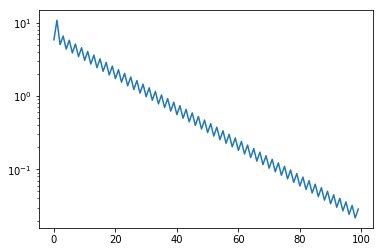

In [232]:

plt.figure()
y = sd_convergences

plt.semilogy(y)


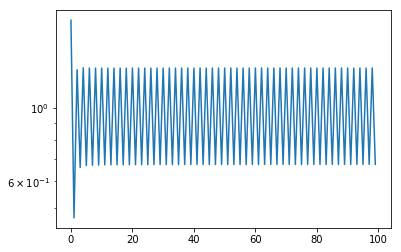

In [233]:
#jacobi_convergence_factors
plt.figure()
plt.semilogy(sd_convergence_factors)


#### Conjugate Gradient

In [220]:
def conjugate_gradient(A, b, x_0, maxIter, epsilon, convergence_criterion):
    convergences = []
    convergence_factors = []
    x_prev = x_0
    p_prev = b - np.dot(A, x_0)
    r_prev = p_prev
    convergence_prev = np.linalg.norm(np.dot(A, x_prev) - b)
    for k in range(maxIter):
        convergences.append(convergence_prev)
        numerator1 = np.dot(r_prev.T,r_prev)
        denominator1 = np.dot(p_prev.T, (np.dot(A, p_prev)))
        alpha = numerator1 / denominator1
        x_k = x_prev + alpha * p_prev
        convergence = np.linalg.norm(np.dot(A, x_k) - b)
        convergence_factor = convergence / convergence_prev
        convergence_factors.append(convergence_factor)
        r_k = r_prev - alpha * np.dot(A, p_prev)
        if convergence_factor <= convergence_criterion:
            break
        numerator2 = np.dot(r_k.T,r_k)
        denominator2 = numerator1
        beta = numerator2 / denominator2
        p_k = r_k + beta * p_prev
        x_prev, p_prev, r_prev = (x_k, p_k, r_k)
        convergence_prev = convergence
    return x_prev, convergences, convergence_factors

In [221]:
maxIter = 100
epsilon = 0.001
convergence_criterion = 0.001
learned_x, cg_convergences, cg_convergence_factors = conjugate_gradient(A, b, x, maxIter, epsilon, convergence_criterion)

In [226]:
# learned_r = np.dot(A,learned_x) - b
# print(learned_r[:10])
# print(learned_x.shape)

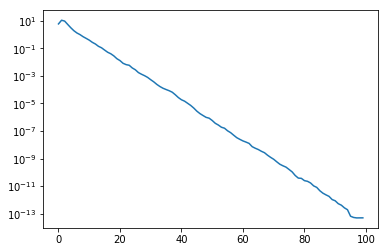

In [224]:

plt.figure()
y = cg_convergences

plt.semilogy(y)


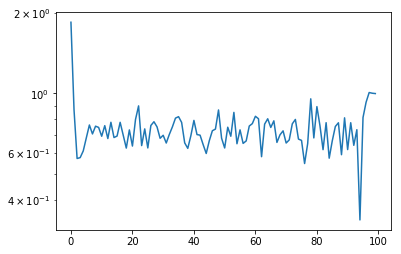

In [225]:
#jacobi_convergence_factors
plt.figure()
plt.semilogy(cg_convergence_factors)


In [227]:
# (np.dot(A,learned_x) - b)[:10]
# learned_x.shape

### 2. Convergence properties

Throughout this section we will use the fact that if $A$ is SPD then $A^{-1}$ is also SPD, and if $\lambda$ is an eigenvalue of $A$ then $\frac{1}{\lambda}$ is an eigenvalue of $A^{-1}$.<br>
proof:<br>
a. $A^{-1}$ is symetric: $(A^{-1})^\top = (A^\top)^{-1} = A^{-1}$.<br>
b. $A^{-1}$ is PD: If $v$ is an eigenvector of $A$ then we have:<br>
$Av = \lambda v \Rightarrow A^{-1}Av = \lambda A^{-1}v \Rightarrow \frac{1}{\lambda}v = A^{-1}v$. So all of $A^{-1}$ eigenvalues are also positive and so $A^{-1}$ is PD.<br>
What this means is that $\lambda_{max\{A^{-1}\}}$ is $\frac{1}{\lambda_{min\{A\}}}$, and that $\lambda_{min\{A^{-1}\}}$ is $\frac{1}{\lambda_{max\{A\}}}$.

#### (a) Show that for any symmetric positive definite matrix $A ∈ R^{n\times n}$, the Richardson method $\textbf{x}^{(k+1)} = \textbf{x}^{(k)} + \frac{1}{∥A∥}(\textbf{b} - A\textbf{x}^{(k)})$, converges to the solution of $Ax = b$, where $∥ · ∥$ is any induced matrix norm.
<br>Answer:

In order to prove convergence of the method we learned that it is enough to show that: $\rho(I-M^{-1}A) = \rho(I-\frac{1}{∥A∥}A) \leq 1$.<br>
Let $T := I-\frac{1}{∥A∥}A$.<br>
Let $v_i$ be an eigenvector of $A$ and $\lambda_i$ its corresponding eigenvalue. Then $v_i$ is an eigenvector of $T$ and its corresponding eigenvalue is $(1-∥A∥^{-1}\lambda_i)$.<br>
Proof: $Tv_i = (I-\frac{1}{∥A∥}A)v_i = v_i-\frac{1}{∥A∥}Av_i = v_i-\frac{1}{∥A∥}\lambda_iv_i = (1-∥A∥^{-1}\lambda_i)v_i$.<br>
We are looking for $\rho(T)$, which is $T$'s biggest eigenvalue.<br>
$(1-∥A∥^{-1}\lambda_i)$ will be maximal when we use $\lambda_i = \lambda_{min}$.<br>
So we need to show that $\rho(T) = (1-∥A∥^{-1}\lambda_{min}) < 1$.<br>
Since we know that $∥A∥ > \rho(A) = \lambda_{max}$, then $∥A∥ > \lambda_{min}$, and since all eigenvalues of an SPD matrix are positive, we get that $0<\frac{\lambda_{min}}{∥A∥}<1$.<br>
And finally:<br>
$\rho(T) = (1-\frac{\lambda_{min}}{∥A∥}) < 1-\frac{\lambda_{min}}{\lambda_{max}} < 1$.

#### <br>(b) Show that if $A$ in the previous section is indefinite (has both positive and negative eigenvalues), then the Richardson method diverges.
<br>Answer:

Since A has both positive and negative eigenvalues, we can induce that $\lambda_{max}=\rho(A)>0$ and that $\lambda_{min} < 0$, and since $∥A∥ > \rho(A)$ then it is also positive, and so we get:<br>
$\rho(T) = (1-\frac{\lambda_{min}}{∥A∥}) > 1$.

#### (c) We will now prove the convergence of Steepest Descent with optimal choice of $α^{(k)} = α_{opt}$ as shown in Section 4.3.2 in the NLA notes.

#### i. Show that (recall: $A ≻ 0$) $f(x^{(k+1)})=f(x^{(k)})−\frac{1}{2}\frac{⟨r^{(k)},Ae^{(k)}⟩^2}{⟨r^{(k)},Ar^{(k)}⟩}<f(x^{(k)})$, where $f(x) = \frac{1}{2}∥x^∗−x∥^2_A$ , defined in Eq. 17 in the notes. The strict inequality holds as long as that $r^{(k)}\neq0$.
<br>Answer:

We know that:<br>

$1. x^{(k+1)} = 
x^{(k)}+\alpha^{(k)}_{opt}(b-Ax) \Rightarrow e^{(k+1)} = 
e^{(k)}-\alpha^{(k)}_{opt}(r^{(k)})$<br>

$2. f(x^{(k)}) = 
\frac{1}{2}∥x^∗−x^{(k)}∥^2_A = 
\frac{1}{2}∥e^{(k)}∥^2_A = 
\frac{1}{2}\langle e^{(k)},Ae^{(k)}\rangle$.<br><br>

$f(x^{(k+1)}) = 
\frac{1}{2}∥e^{(k)}-\alpha^{(k)}_{opt}(r^{(k)})∥^2_A = 
\frac{1}{2}\langle e^{(k)},Ae^{(k)}\rangle - \alpha\langle e^{(k)},Ar^{(k)}\rangle + \frac{1}{2}\alpha^2\langle r^{(k)},Ar^{(k)}\rangle =$

$= f(x^{(k)}) - \frac{\langle e^{(k)}, r^{(k)}\rangle_A}{\langle r^{(k)}, r^{(k)}\rangle_A}\langle e^{(k)}, r^{(k)}\rangle_A + \frac{1}{2} \frac{\langle e^{(k)}, r^{(k)}\rangle^2_A}{\langle r^{(k)}, r^{(k)}\rangle^2_A}\langle r^{(k)}, r^{(k)}\rangle_A$<br>

$\Rightarrow f(x^{(k+1)}) = 
f(x^{(k)})-\frac{1}{2} \frac{\langle e^{(k)}, r^{(k)}\rangle^2_A}{\langle r^{(k)}, r^{(k)}\rangle_A} = 
f(x^{(k)})-\frac{1}{2} \frac{\langle r^{(k)}, r^{(k)}\rangle^2}{\langle r^{(k)}, r^{(k)}\rangle_A}$<br>
Since A is an SPD matrix (and assuming that the residual vector in the k'th iteration isn't zero yet) then the fraction we are removing from $f(x^{(k)})$ is positive, and so $f(x^{(k+1)}) < f(x^{(k)})$.<br>

#### ii. Using the previous section, find a scalar factor $C^{(k)}$ such that $f(x^{(k+1)}) = C^{(k)} · f(x^{(k)})$ where $C^{(k)} < 1$.<br>
Answer:

Based on the previous section we get:<br>

$f(x^{(k+1)}) = 
f(x^{(k)})\cdot(1-\frac{1}{2f(x^{(k)})} \frac{\langle e^{(k)}, r^{(k)}\rangle^2_A}{\langle r^{(k)}, r^{(k)}\rangle_A})$.

So we take $C = (1-\frac{1}{2f(x^{(k)})} \frac{\langle e^{(k)}, r^{(k)}\rangle^2_A}{\langle r^{(k)}, r^{(k)}\rangle_A})$<br>
Since $f(x^{(k)})$ is positive (since it is a A-norm and A is SPD) and based on the previous section we have agin that the fraction in $C$ is positive and thus $C < 1$. <br>

#### iii. Now, using the fact that for every symmetric matrix $A ∈ R^{n×n}: ∀v∈R^n :λ_{min} ≤ \frac{v^⊤Av}{v^⊤v} ≤ λ_{max}$, (this is called a Rayleigh quotient) show that $C^{(k)} ≤ 1 − \frac{λ_{min}}{λ_{max}} < 1$.<br>

Answer:

Since $A$ is SPD then every $\lambda > 0$ and thus $\frac{λ_{min}}{λ_{max}} > 0$. Therefor it is clear that $1-\frac{λ_{min}}{λ_{max}} < 1$.<br>
We now just need to prove that $C^{(k)} ≤ 1 − \frac{λ_{min}}{λ_{max}}$, which means that $\frac{λ_{min}}{λ_{max}} \leq 1-C^{(k)}$.


$1-C^{(k)} = 1-1+\frac{1}{2f(x^{(k)})} \frac{\langle e^{(k)}, r^{(k)}\rangle^2_A}{\langle r^{(k)}, r^{(k)}\rangle_A}=
\frac{2\langle r^{(k)}, r^{(k)}\rangle^2}{2\langle e^{(k)}, Ae^{(k)}\rangle\langle r^{(k)}, r^{(k)}\rangle_A}=
\frac{\langle r^{(k)}, r^{(k)}\rangle}{\langle e^{(k)}, r^{(k)}\rangle}\cdot\frac{\langle r^{(k)}, r^{(k)}\rangle}{\langle r^{(k)}, Ar^{(k)}\rangle}\geq$<br>

$\geq \frac{\langle r^{(k)}, r^{(k)}\rangle}{\langle A^{-1}Ae^{(k)}, r^{(k)}\rangle}\cdot \lambda_{min}=
\frac{\langle r^{(k)}, r^{(k)}\rangle}{\langle A^{-1}r^{(k)}, r^{(k)}\rangle}\cdot \lambda_{min}=
\frac{\langle r^{(k)}, r^{(k)}\rangle}{\langle r^{(k)}, A^{-1}r^{(k)}\rangle}\cdot \lambda_{min}\geq
\frac{1}{\lambda_{max}}\cdot\lambda_{min}$

$\Rightarrow 1-C^{(k)} \geq \frac{\lambda_{min}}{\lambda_{max}}$.<br>

#### iv. Conclude that SD converges: $lim_{k→∞}f(x^{(k)}) = 0$, and hence $lim_{k→∞} x^{(k)} = x^∗ $.<br>

Answer:

Based on the previous sections:<br>
$f(x^{(k)}) = 
C^{(k-1)}\cdot f(x^{(k-1)}) =
C^{(k-1)}\cdot C^{(k-2)}\cdot f(x^{(k-2)}) = ... = $
$= C^{(k-1)}\cdot C^{(k-2)}\cdots C^{(0)}\cdot f(x^{(0)})$<br>
Let $C^{i}_{max}$ be the $C$ in the iteration which got the highest value. We get that:<br>
$f(x^{(k)}) \leq {C^{(i)}}^k\cdot f(x^{(0)})$.<br>
Since $C^{(i)} < 1$ then $lim_{k→∞} {C^{(i)}}^k =0$ and therefore $lim_{k→∞}f(x^{(k)})= 0$ and hence $lim_{k→∞} x^{(k)} = x^∗ $..<br>

### 3. In this question we will develop a method called GMRES(1). Assume that $A ∈ R^{n×n}$ is full rank, positive definite, but non-symmetric. We want to solve a linear system Ax = b using a method that is similar to Steepest Descent (SD). We define $x^{(k+1)} = x^{(k)} + α^{(k)}(b − Ax^{(k)})$, and we choose $α^{(k)}$ to minimize the residual norm $∥r^{(k+1)}∥_2$ with respect to $α^{(k)}$.

#### (a) Show that $α^{(k)} = \frac{(r^{(k)})^⊤Ar^{(k)}}{(r^{(k)})^⊤A^⊤Ar^{(k)}} $.<br>

Answer:

we would like to minimize the residual norm via the following function:<br>

$f_r(x^{(k)}) := \frac{1}{2}∥r^{(k)}∥_2^2 = \frac{1}{2}∥b-Ax^{(k)}∥_2^2$.<br>

Now we would like to minimize the following function for $\alpha$:<br>

$g_r(\alpha) := f_r(x^{(k)}+\alpha r^{(k)}) =
\frac{1}{2}∥b-A(x^{(k)}+\alpha r^{(k)})∥_2^2 =
\frac{1}{2}∥b-Ax^{(k)}+A\alpha r^{(k)}∥_2^2 =$

$=\frac{1}{2}∥r^{(k)}+\alpha Ar^{(k)}∥_2^2 =
\frac{1}{2}\langle r^{(k)},r^{(k)}\rangle -\alpha\langle r^{(k)},Ar^{(k)}\rangle + \frac{1}{2}\alpha^2\langle Ar^{(k)},Ar^{(k)}\rangle$

$\nabla g_r(\alpha) = 0 \Rightarrow -\langle r^{(k)},Ar^{(k)}\rangle + \alpha\langle Ar^{(k)},Ar^{(k)}\rangle = 0$

$\Rightarrow \alpha = \frac{\langle r^{(k)},Ar^{(k)}\rangle}{\langle Ar^{(k)},Ar^{(k)}\rangle} = 
\frac{(r^{(k)})^⊤Ar^{(k)}}{(r^{(k)})^⊤A^⊤Ar^{(k)}}$


#### (c) Demonstrate the convergence of the GMRES method

In [264]:
A = np.row_stack(([5, 4, 4, -1, 0],[3, 12, 4, -5, -5],[-4, 2, 6, 0, 3],[4, 5, -7, 10, 2],[1, 2, 5, 3, 10]))
b = np.ones((5,1))
x_0 = np.zeros((5,1))

In [267]:
residuals = []
x_prev = x_0
iters = 50
for k in range(1,iters+1):
    r_prev = b - np.dot(A, x_prev)
    r_norm_prev = np.linalg.norm(r_prev)
    residuals.append(r_norm_prev)
    
    numerator = np.dot(r_prev.T, (np.dot(A, r_prev)))
    denominator = np.dot(np.dot(r_prev.T,A.T), (np.dot(A, r_prev)))
    alpha = numerator / denominator
    
    x_k = x_prev + alpha * r_prev
    x_prev = x_k

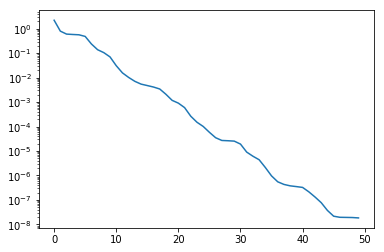

In [268]:

plt.figure()
y = residuals

plt.semilogy(y)


#### (d) The graph that you get in the previous subsection is monotone. Explain why?<br>

Answer:

We know that the $g_r(\alpha)$ function (which uses $x^{(k)}$ for its calculations) is the squared $l2$ norm of the residual at iteration $(k+1)$ since:<br>
$g_r(\alpha) := f_r(x^{(k)}+\alpha r^{(k)}) =
\frac{1}{2}∥b-A(x^{(k)}+\alpha r^{(k)})∥_2^2 =
\frac{1}{2}∥b-Ax^{(k+1)}∥_2^2 =
\frac{1}{2}∥r^{(k+1)}∥_2^2$.<br>
Thus, minimizing the $\alpha$ at each iteration means we are finding the optimal $\alpha$ for minimizing the residual norm at each iteration. Since the residual norm as a convex function (can easily be inferred by the answer to 4.b) then at every iteration we are getting closer to the global minimum in a monotonic fasion.<br>

#### (e) Explicitly define the method GMRES(2):<br>$x^{(k+1)}=x^{(k)}+\alpha_1^{(k)} r^{(k)}+\alpha_2^{(k)} r^{(k-1)}$.<br>In vector form this will be $x^{(k+1)}=x^{(k)}+R^{(k)}\overrightarrow{\alpha}^{(k)}$, where $R$ is a $n\times 2$ matrix.<br>Find a closed form for $\overrightarrow{\alpha}$.<br>

Answer:

We'll define $f_{r_2}(x^{(k)}) := f_r(x^{(k)})$, where $f_r(x^{(k)})$ was defined in the previous paragraphs.<br>
Let $g_{r_2}(\overrightarrow{\alpha}^{(k)}) := 
f_{r_2}(x^{(k)}+R^{(k)}\overrightarrow{\alpha}^{(k)}) =
\frac{1}{2}∥b-A(x^{(k)}+R^{(k)}\overrightarrow{\alpha}^{(k)})∥_2^2 =$<br>
$=\frac{1}{2}∥b-Ax^{(k)}-AR^{(k)}\overrightarrow{\alpha}^{(k)}∥_2^2 =
\frac{1}{2}∥r^{(k)}-AR^{(k)}\overrightarrow{\alpha}^{(k)}∥_2^2 =$<br>
$=\frac{1}{2}r^{{(k)}^\top}r^{(k)}-r^{{(k)}^\top}AR^{(k)}\overrightarrow{\alpha}^{(k)}+\frac{1}{2}\overrightarrow{\alpha}^{{(k)}^\top}R^{{(k)}^\top} A^\top AR^{(k)}\overrightarrow{\alpha}$.<br>

$\nabla g_{r_{2}}(\overrightarrow{\alpha}^{(k)}) = 0 \Rightarrow -R^{{(k)}^\top} A^\top r^{(k)} + R^{{(k)}^\top} A^\top AR^{(k)}\overrightarrow{\alpha}^{(k)} = 0$

$\Rightarrow \overrightarrow{\alpha}^{(k)} = (R^{{(k)}^\top} A^\top AR^{(k)})^{-1}R^{{(k)}^\top} A^\top r^{(k)}$.<br><br>

(If $(R^{{(k)}^\top} A^\top AR^{(k)})^{-1}$ isn't defined, we'll just take the pseudo-inverse).